# Database Systems 4020
## Activity 4
### Riad Mohammed

In [1]:
pip install boto3

Note: you may need to restart the kernel to use updated packages.  Using cached s3transfer-0.5.0-py3-none-any.whl (79 kB)
  Using cached jmespath-0.10.0-py2.py3-none-any.whl (24 kB)



#### 1. (10 points) Create a table named “Recipes” in DynamoDB

In [14]:
# This program uses AWS SDK for Python (Boto 3) to perform CRUD operations in AWS DynamoDB
import boto3
import json
import decimal

dynamodb = boto3.resource('dynamodb', region_name='us-east-1') 

table = dynamodb.create_table(
    TableName='Recipes',
    KeySchema=[
    {
        'AttributeName': 'oid',
        'KeyType': 'HASH'  #Partition key
    },
    {
        'AttributeName': 'name',
        'KeyType': 'RANGE'  #Sort key
    }
    ],
    AttributeDefinitions=[
    {
        'AttributeName': 'oid',
        'AttributeType': 'S' # String
    },
    {
        'AttributeName': 'name',
        'AttributeType': 'S' # String 
    },
    ],
    ProvisionedThroughput={
        'ReadCapacityUnits': 1000,
        'WriteCapacityUnits': 1000
    }
    )
print("Table status:", table.table_status)

Table status: CREATING


#### Inserting data into the database

In [18]:
#Code sampled from Dr.Fitz lecture on 12/2/2021

table = dynamodb.Table('Recipes') 

#recipe_dataset ="recipeitems.json"
with open ("recipeitems.json", encoding="utf8") as json_file:
    for i, line in enumerate(json_file):
        recipe_obj = json.loads(line)
        oid = recipe_obj.pop('_id')['$oid']
        name = recipe_obj.pop('name')
        keys = recipe_obj.keys()
        
        info = {}
        for key in keys:
            info[key] = recipe_obj[key]
            
        Item = {
            "oid": oid,
            "name": name,
            "info": info
        }
        
        table.put_item(
            Item = {
                "oid": oid,
                "name": name,
                "info": info
            }
        )
        

   

#### Below attached is the proof of creation and insertion of data in the database
               
            

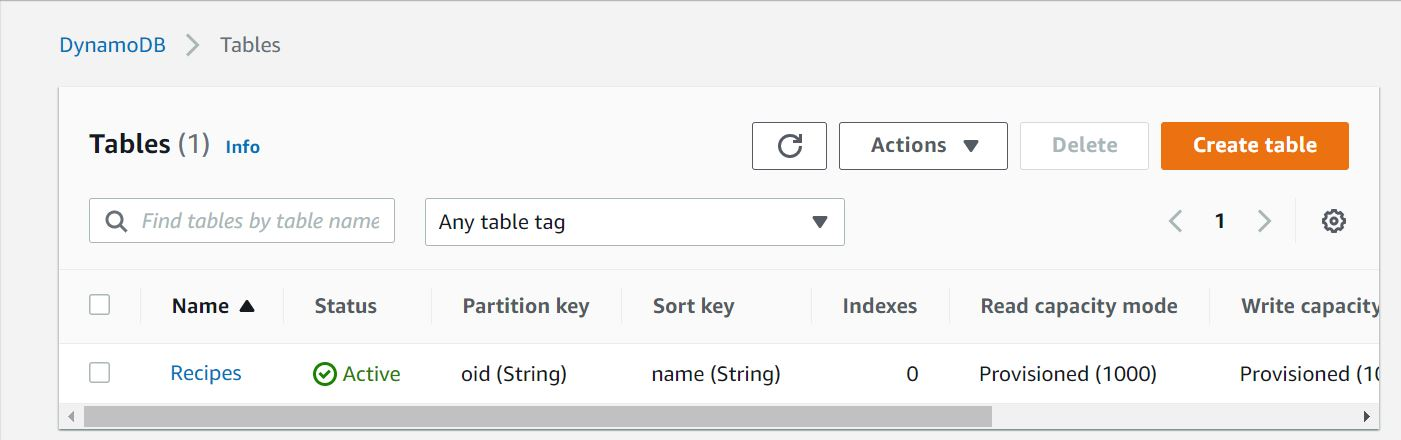

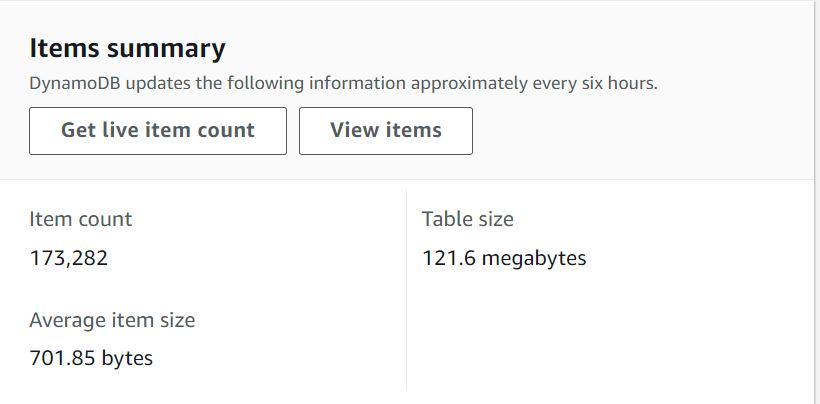

### Question 2) Query and Scan

#### (a) (5 points) Create a query that finds recipes for breakfast foods (the description contains "breakfast" or "Breakfast"). How many are there? (Hint: count the items in the response returned)

In [2]:
import boto3
import json
import decimal

from boto3.dynamodb.conditions import Key, Attr
dynamodb = boto3.resource('dynamodb', region_name='us-east-1') 
table = dynamodb.Table('Recipes') 

print("Description that contains breakfast or Breakfast")

response = table.scan(
    FilterExpression=Attr('info.description').contains('breakfast') | Attr('info.description').contains('Breakfast')
)

total_count=0
total_count=response['Count']

while 'LastEvaluatedKey' in response:
    response= table.scan(
        FilterExpression=Attr('info.description').contains('breakfast') | Attr('info.description').contains('Breakfast'),
        ExclusiveStartKey=response['LastEvaluatedKey']
    )
    
    total_count=total_count+response['Count']
    
print(total_count)
    

Description that contains breakfast or Breakfast
3524


#### (b) (5 points) Issue a query to find out how many of the recipes list "cinnamon/Cinnamon" as an ingredient.



In [3]:
import boto3
import json
import decimal

from boto3.dynamodb.conditions import Key, Attr
dynamodb = boto3.resource('dynamodb', region_name='us-east-1') 
table = dynamodb.Table('Recipes') 

print("Ingredients that contains cinnamon or Cinnamon")

response = table.scan(
    FilterExpression=Attr('info.ingredients').contains('cinnamon') | Attr('info.ingredients').contains('Cinnamon')
)

total_count=0
total_count=response['Count']

while 'LastEvaluatedKey' in response:
    response= table.scan(
        FilterExpression=Attr('info.ingredients').contains('cinnamon') | Attr('info.ingredients').contains('Cinnamon'),
        ExclusiveStartKey=response['LastEvaluatedKey']
    )
    
    total_count=total_count+response['Count']
    
print(total_count)

Ingredients that contains cinnamon or Cinnamon
10526


#### (c) (5 points) Issue a query to find out how many of the recipes list misspelled "cinamon" as an ingredient.


In [4]:
import boto3
import json
import decimal

from boto3.dynamodb.conditions import Key, Attr
dynamodb = boto3.resource('dynamodb', region_name='us-east-1') 
table = dynamodb.Table('Recipes') 

print("Ingredients that contains misspelled cinamon")

response = table.scan(
    FilterExpression=Attr('info.ingredients').contains('cinamon') 
)

total_count=0
total_count=response['Count']

while 'LastEvaluatedKey' in response:
    response= table.scan(
        FilterExpression=Attr('info.ingredients').contains('cinamon'),
        ExclusiveStartKey=response['LastEvaluatedKey']
    )
    
    total_count=total_count+response['Count']
    
print(total_count)

Ingredients that contains misspelled cinamon
9
